# Unsupervised Learning  Assignment

### Problem Statement:
===========================

You work in XYZ Company as a Python. The company officials want you to write code for a clustering problem.

Tasks to beperformed:

1. K-Means Clustering:
    - Load customer data.
    - Check the number of cells in each column with null values.
    - Create a scatter plot with Age as X and Spending Score as Y.
    - Find out the best number for clusters between1 and 10 (inclusive) using the elbow method.
    - Draw a scatter plot displaying data points colored on the basis of clusters.
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
df = pd.read_csv(r"customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#lower the headers
columns = [ col.lower().replace(" ", "_") for col in df.columns ]
df.columns = columns


In [4]:
df.head()

,customerid,gender,age,annual_income_(k$),spending_score_(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isna().sum()

customerid                0
gender                    0
age                       0
annual_income_(k$)        0
spending_score_(1-100)    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customerid              200 non-null    int64 
 1   gender                  200 non-null    object
 2   age                     200 non-null    int64 
 3   annual_income_(k$)      200 non-null    int64 
 4   spending_score_(1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,customerid,age,annual_income_(k$),spending_score_(1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.describe(include = 'object')

,gender
count,200
unique,2
top,Female
freq,112


<AxesSubplot:xlabel='age', ylabel='spending_score_(1-100)'>

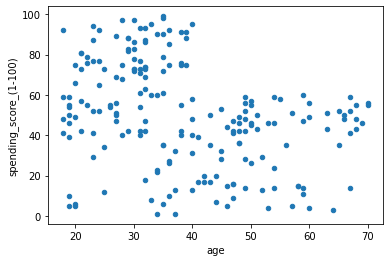

In [9]:
df.plot.scatter('age', 'spending_score_(1-100)')

In [10]:
from sklearn.cluster import KMeans

In [11]:
data =df [['age', 'spending_score_(1-100)']].values
##feed for model

In [12]:
data[:10,:]

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72]], dtype=int64)

In [13]:
i = []
for n in range(1,11):
    km = KMeans(n_clusters=n)
    km.fit(data)
    i.append(km.inertia_)
i

[171535.50000000003,
 75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23811.5235247209,
 19502.407839362197,
 15514.193134351033,
 13073.827094017104,
 11454.624875243522,
 10145.183971588804]

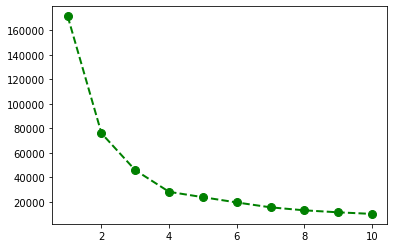

In [14]:
plt.plot(range(1,11), i,color='green', marker='o', linestyle='dashed',
...      linewidth=2, markersize=8)
plt.show()

In [15]:
model = KMeans(n_clusters=4)
model.fit(data)
labels = model.labels_
cluster_df = pd.DataFrame(data, columns=["age", "spending_score_(1-100)"])
cluster_df = cluster_df.assign(labels=labels)
cluster_df

,age,spending_score_(1-100),labels
0,19,39,3
1,21,81,0
2,20,6,1
3,23,77,0
4,31,40,3
...,...,...,...
195,35,79,0
196,45,28,1
197,32,74,0
198,32,18,1


<AxesSubplot:xlabel='age', ylabel='spending_score_(1-100)'>

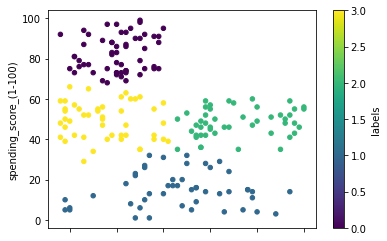

In [16]:
cluster_df.plot.scatter(x="age", y="spending_score_(1-100)", c= "labels", colormap = "viridis")

In [17]:
#silhoutte Score
from sklearn.metrics import silhouette_score
score_k={}
best_n_cluster = None
best_n_cluster_val =None


for n_clusters in range(2,11):
    cluster = KMeans(n_clusters=n_clusters)
    preds = cluster.fit_predict(data)
    #print(preds)
    centers = cluster.cluster_centers_
    score = silhouette_score(data, preds)
    #print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    score_k[n_clusters] = score
for key, val in score_k.items():
    if val == max(list(score_k.values())):
        best_n_cluster = key
        best_n_cluster_val=val
        
best_n_cluster


        
        
    
        


4

In [18]:
def visualize_clusters(labels, colorPalette):
    """
    This method is used to plot clusters
    args:
    labels: Cluster Labels
    """
    vdf = pd.DataFrame(data, columns=["X1", "X2"])
    vdf = vdf.assign(labels=labels)
    return vdf.plot.scatter(x="X1", y="X2", \
                            c= "labels", colormap = colorPalette)



In [22]:
def get_cluster_lables(data, evaluate, n, colorPalette="viridis"):
    """
    This method will automate the n_cluster selection
    data: 2-D Array
    evaluate: 0 if to be evaluated else 1 if best n_cluster if fixed
    n: if evaluate=0, number of clusters to try else best fit cluster if evaluate =1
    colorPalette(optional) : color code for the plot
    """
    score_k={}
    best_n_cluster = None
    best_n_cluster_val =None

    if not evaluate:
        for n_clusters in range(2,n+1):
            cluster = KMeans(n_clusters=n_clusters)
            preds = cluster.fit_predict(data)
            #print(preds)
            centers = cluster.cluster_centers_
            score = silhouette_score(data, preds)
            #print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
            score_k[n_clusters] = score
        for key, val in score_k.items():
            if val == max(list(score_k.values())):
                best_n_cluster = key
                best_n_cluster_val=val
        print("Best N Cluster: {0}, score :{1}".format(best_n_cluster, best_n_cluster_val))
                
        get_cluster_lables(data,1,best_n_cluster,colorPalette)         
    if evaluate:
        cluster = KMeans(n_clusters=n)
        preds = cluster.fit_predict(data)
        #print(preds)
        centers = cluster.cluster_centers_
        score = silhouette_score(data, preds)
        visualize_clusters(preds, colorPalette)
        
    return score

Best N Cluster: 4, score :0.49973941540141753


0.40418091874659995

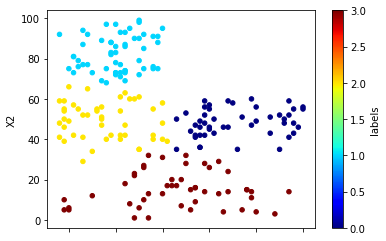

In [24]:
get_cluster_lables(data,0,10, "jet")

Best N Cluster: 4, score :0.49973941540141753


0.4085372494848275

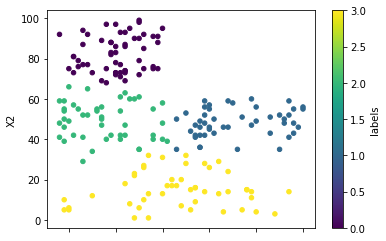

In [25]:
get_cluster_lables(data,0,10) #without colorpalette

Best N Cluster: 4, score :0.49973941540141753


0.4243185935319762

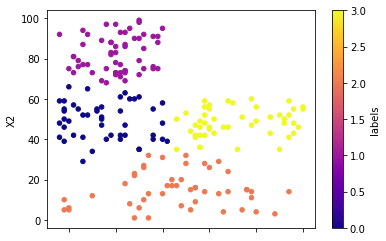

In [28]:
get_cluster_lables(data,0,30, "plasma") 

Best N Cluster: 2, score :0.4692341232501655


0.4692341232501655

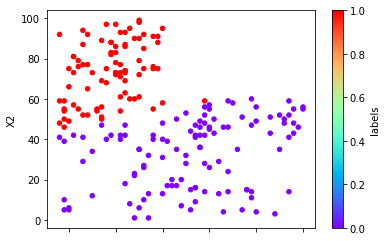

In [27]:
get_cluster_lables(data,0,2, "rainbow") 